In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

$$
\text{ARPD} = \frac{100}{n} \sum_{i=1}^n \left( \frac{|f_i - f^*|}{|f^*|} \right)
$$

$$ \sum_{i \in b_j} s_i \leq C \quad \forall b_j \in B $$

$$ I = \{i_1, i_2, \ldots, i_n\} $$

In [140]:
# Load the Excel files into separate dataframes
genetic_df = pd.read_excel('Statistics/genetic_statistics.xlsx')
pso_df = pd.read_excel('Statistics/pso_statistics.xlsx')
aco_df = pd.read_excel('Statistics/aco_statistics.xlsx')

In [146]:
pso_df["Gap"] = pso_df["Gap"].apply( lambda x: 0 if x< 0 else  x )

In [147]:
pso_df

,Instance Set,Best Known Solution,Min,Max,Variance,Mean,Gap,Time
0,cl_01_020_09.ins2D,8,8,8,0.00,8,0,0
1,cl_01_040_04.ins2D,13,14,14,0.00,14,1,4
2,cl_01_060_05.ins2D,19,19,19,0.00,19,0,0
3,cl_01_080_08.ins2D,29,29,29,0.00,29,0,286
4,cl_01_100_06.ins2D,37,37,38,0.08,37,0,300
5,cl_02_020_04.ins2D,1,1,1,0.00,1,0,0
6,cl_02_040_02.ins2D,2,2,2,0.00,2,0,0
7,cl_02_060_03.ins2D,3,3,3,0.00,3,0,0
8,cl_02_080_01.ins2D,3,3,4,0.08,3,0,1
9,cl_02_100_02.ins2D,4,4,4,0.00,4,0,2


In [148]:
def plot_gaps(dfs, algorithm_names):
    # Extract the necessary columns for plotting and create a color map
    gaps = [df[['Instance Set', 'Gap']] for df in dfs]
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    # Number of instance sets per plot
    sets_per_plot = 5

    # Create subplots
    num_plots = -(-len(gaps[0]) // sets_per_plot)  # Ceiling division for the number of plots needed
    nrows = (num_plots + 1) // 2  # Calculate the number of rows needed with 2 plots per row
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(30, nrows * 10), sharey=True)
    fig.suptitle('Gap Comparison Across Algorithms')

    bar_width = 0.25  # Set a consistent bar width

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot the Gap column for each instance set in chunks of sets_per_plot
    for i in range(num_plots):
        start_idx = i * sets_per_plot
        end_idx = start_idx + sets_per_plot
        subset_instance_sets = gaps[0]['Instance Set'].values[start_idx:end_idx]
        
        bar_positions = range(len(subset_instance_sets))
        
        for j, gap_df in enumerate(gaps):
            subset_df = gap_df[gap_df['Instance Set'].isin(subset_instance_sets)]
            axes[i].bar([pos + j * bar_width for pos in bar_positions], subset_df['Gap'], 
                        label=algorithm_names[j], color=colors[j % len(colors)], width=bar_width, alpha=0.6)
        
        axes[i].set_title(f'Instance Sets {start_idx+1}-{end_idx}')
        axes[i].set_xlabel('Instance Set')
        axes[i].set_ylabel('Gap')
        axes[i].legend()
        axes[i].set_xticks([pos + bar_width for pos in bar_positions])
        axes[i].set_xticklabels(subset_instance_sets, rotation=45, ha='right')

    # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



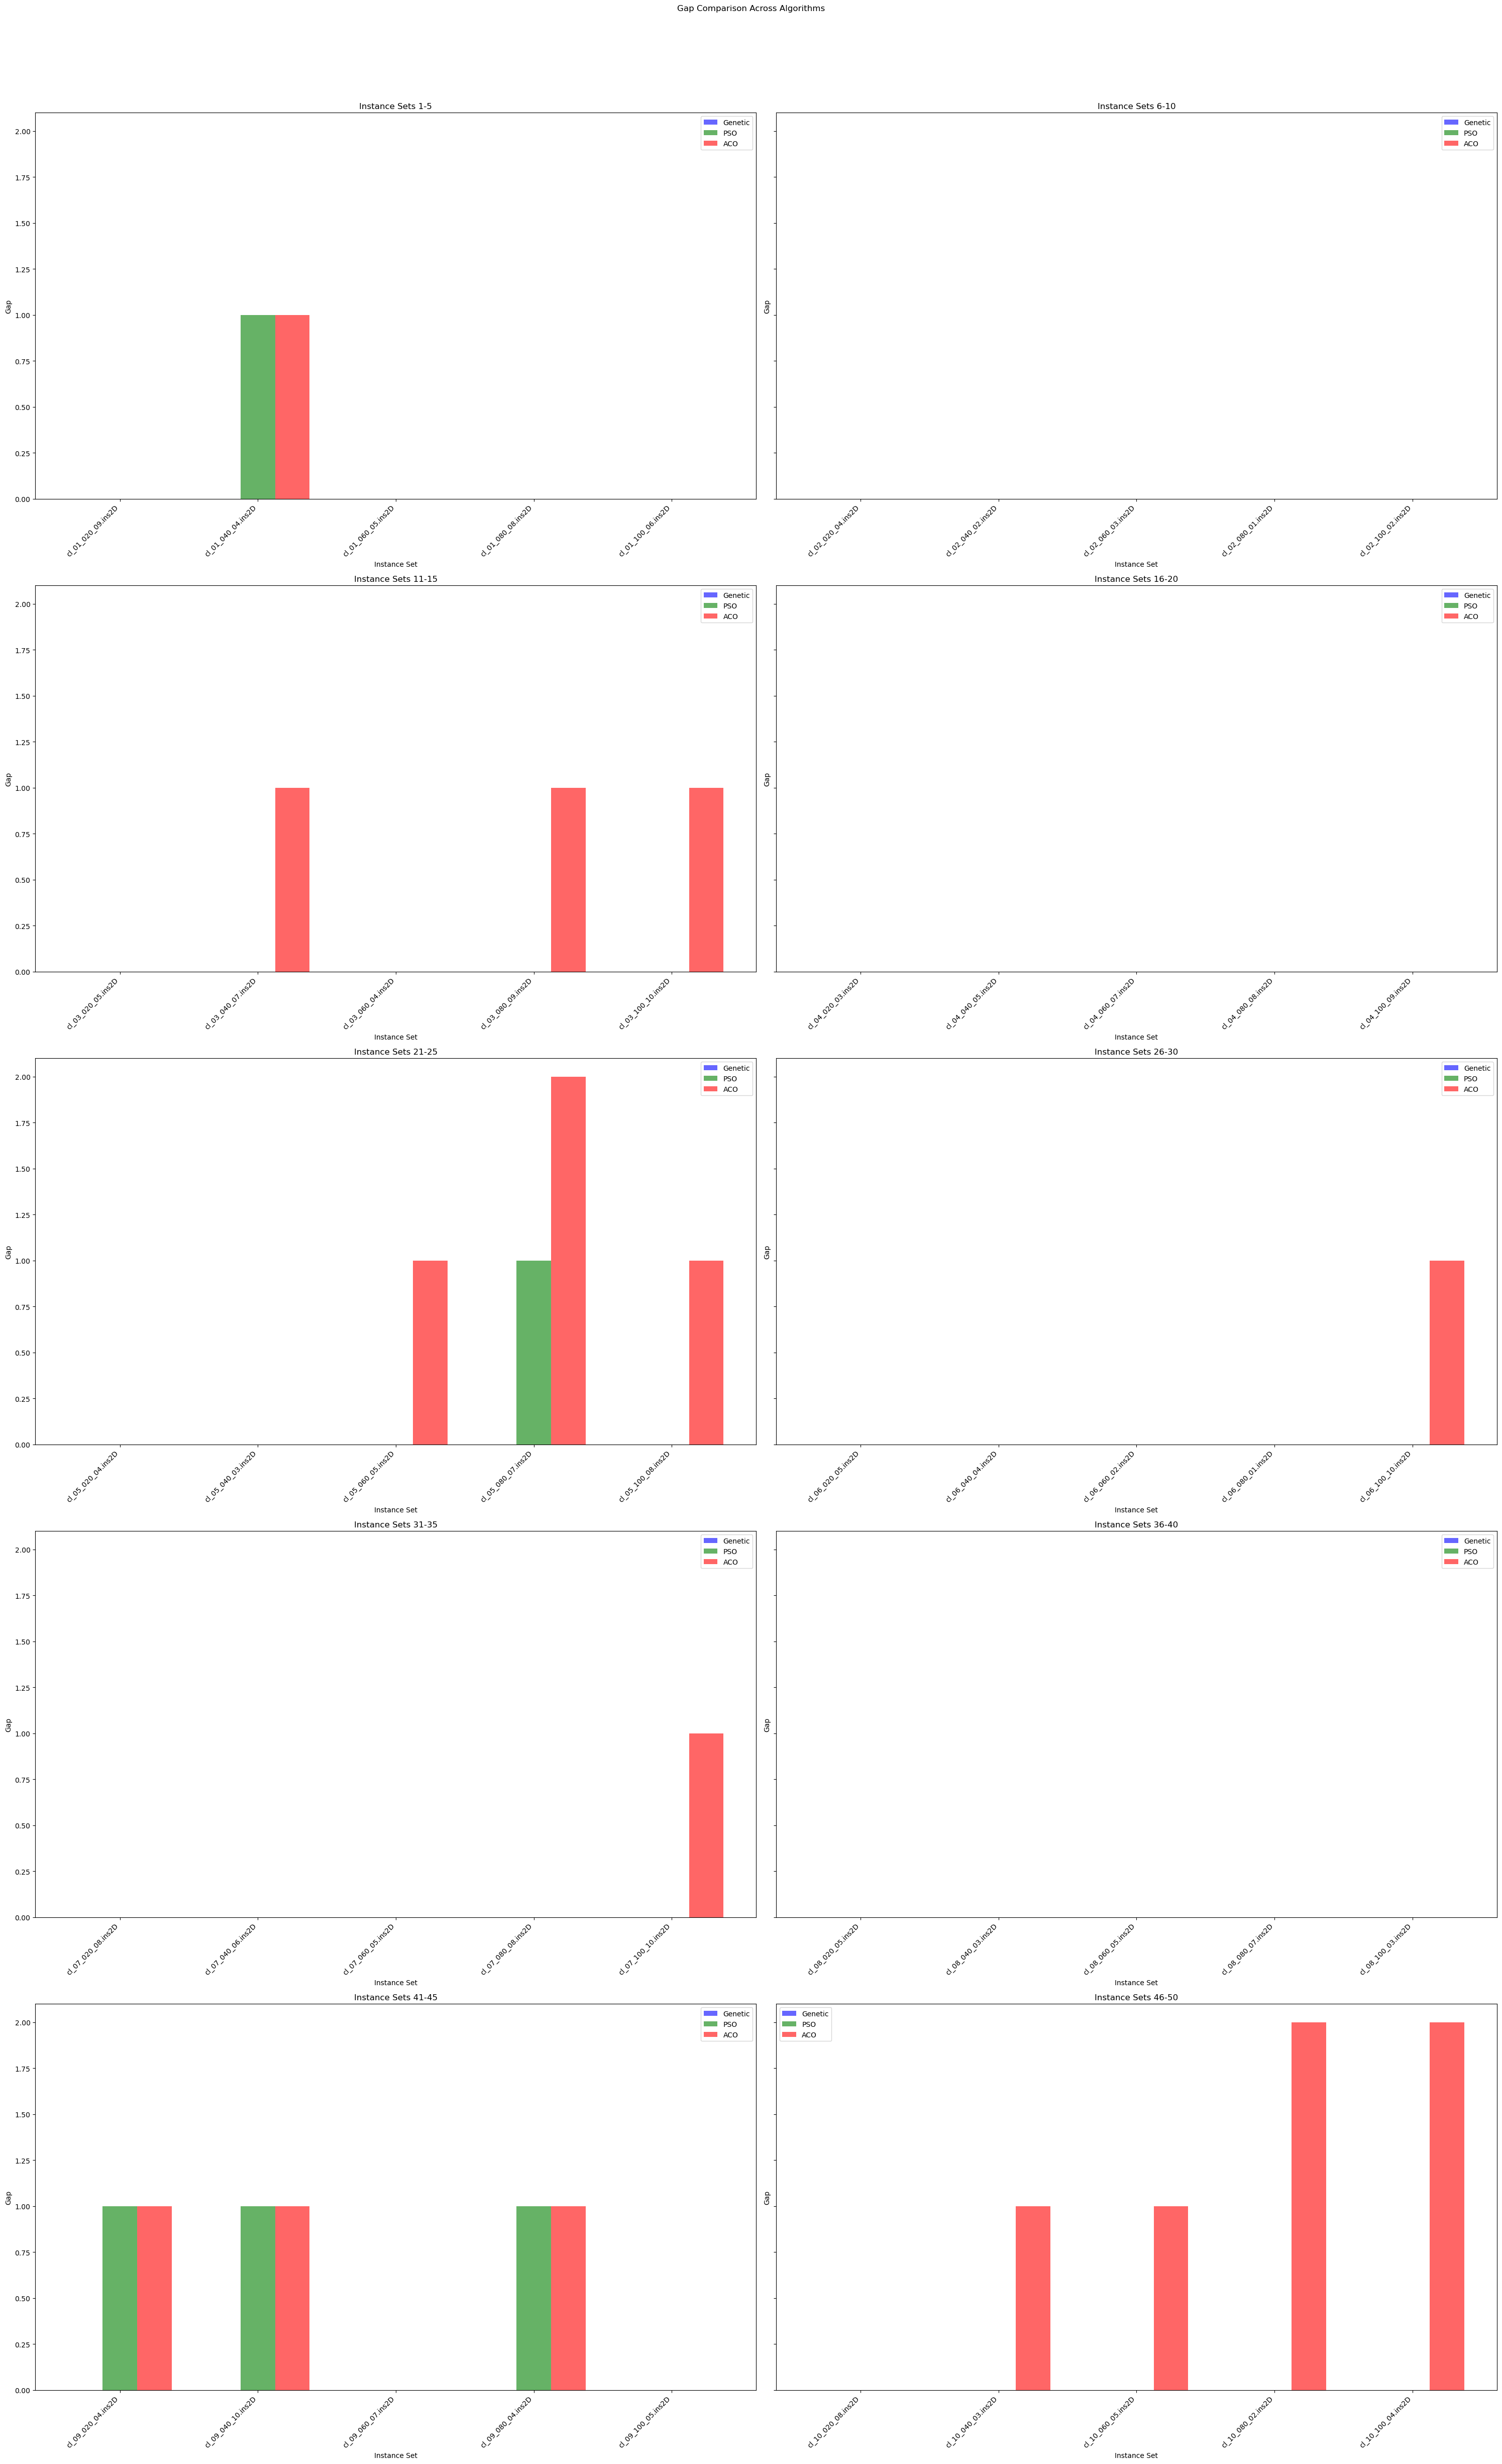

In [149]:
# Call the function with a list of dataframes and algorithm names
plot_gaps([genetic_df, pso_df, aco_df], ['Genetic', 'PSO', 'ACO'])


In [151]:

for df in [genetic_df,pso_df, aco_df]:
    print(round(sum(df["Gap"] / df["Best Known Solution"]) / len(df),3))

0.0
0.005
0.028


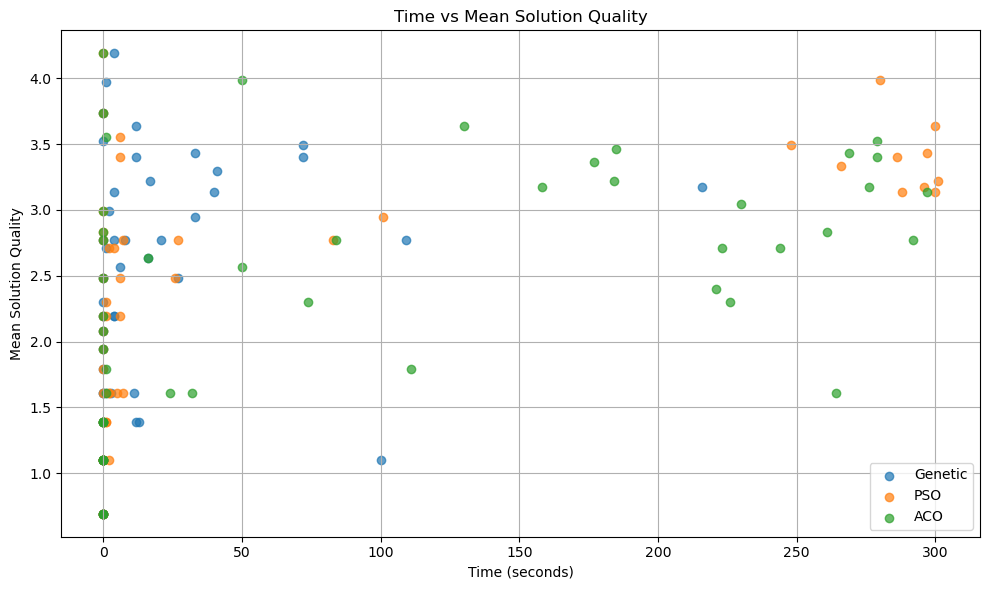

In [152]:



# Create a scatter plot to compare time and mean solution quality
plt.figure(figsize=(10, 6))

# Plot for GRASP
plt.scatter(genetic_df['Time'], np.log1p(genetic_df['Mean']), label='Genetic', alpha=0.7)
# Plot for SA
plt.scatter(pso_df['Time'], np.log1p(pso_df['Mean']), label='PSO', alpha=0.7)
# Plot for TS
plt.scatter(aco_df['Time'], np.log1p(aco_df['Mean']), label='ACO', alpha=0.7)

plt.title('Time vs Mean Solution Quality')
plt.xlabel('Time (seconds)')
plt.ylabel('Mean Solution Quality')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [153]:
def borda_count_ranking(dfs, algorithm_names):
    # Create a dataframe to store ranks and points
    combined_df = pd.DataFrame()

    for algorithm_name, df in zip(algorithm_names, dfs):
        df['Algorithm'] = algorithm_name
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Rank algorithms by 'Time' (ascending) and 'Mean' (ascending)
    combined_df['Time Rank'] = combined_df.groupby('Instance Set')['Time'].rank(method='min')
    combined_df['Mean Rank'] = combined_df.groupby('Instance Set')['Mean'].rank(method='min')

    # Assign Borda count points (higher rank gets more points)
    max_rank = len(algorithm_names)
    combined_df['Time Points'] = max_rank + 1 - combined_df['Time Rank']
    combined_df['Mean Points'] = max_rank + 1 - combined_df['Mean Rank']

    # Sum points for each algorithm
    total_points = combined_df.groupby('Algorithm')[['Time Points', 'Mean Points']].sum()
    total_points['Total Points'] = total_points.sum(axis=1)

    # Sort by total points (higher is better)
    ranked_algorithms = total_points.sort_values(by='Total Points', ascending=False)

    return ranked_algorithms

In [154]:
# Apply the Borda count ranking
ranked_algorithms = borda_count_ranking([genetic_df, pso_df, aco_df], ['Genetic', 'PSO', 'ACO'])

print(ranked_algorithms)


           Time Points  Mean Points  Total Points
Algorithm                                        
Genetic          128.0        149.0         277.0
PSO              117.0        145.0         262.0
ACO              106.0        121.0         227.0


In [155]:

for df in [genetic_df, pso_df, aco_df]:
    alpha = 0.5
    beta = 0.5
    df["tm_metric"] = (alpha*np.log1p(df["Mean"]) + beta*np.log1p(df["Time"]))

In [156]:
combined_df = pd.concat([genetic_df, pso_df, aco_df])
combined_df["rank"] = combined_df.groupby("Instance Set")["tm_metric"].rank(method="min")
overall_ranks = combined_df.groupby("Algorithm")["rank"].sum().sort_values()
print(overall_ranks)

Algorithm
Genetic    73.0
PSO        84.0
ACO        95.0
Name: rank, dtype: float64


In [158]:
borda = pd.concat([combined_df.iloc[0:50,-1],combined_df.iloc[50:100,-1],combined_df.iloc[100:,-1]],axis=1)

In [160]:
borda.index = genetic_df["Instance Set"]

In [161]:
borda.columns =  ['Genetic', 'PSO', 'ACO']

In [162]:
borda.to_excel("pop_borda_tm.xlsx")